# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [10]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 38s 0us/step


In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

50000/50000 [==============================] - 3s 57us/step - loss: 1.5196 - acc: 0.4614 - val_loss: 1.6680 - val_acc: 0.4100
Epoch 49/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5331 - acc: 0.4595 - val_loss: 1.6621 - val_acc: 0.4230
Epoch 50/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5193 - acc: 0.4616 - val_loss: 1.6224 - val_acc: 0.4268
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)

Epoch 50/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.3883 - acc: 0.8604 - val_loss: 2.2855 - val_acc: 0.5251
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.2328 - acc: 0.1761 - val_loss: 2.1582 - val_acc: 0.2318
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1039 - acc: 0.2517 - val_loss: 2.0604 - val_acc: 0.2739
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.0246 - acc: 0.2882 - val_loss: 1.9957 - val_acc: 0.3046
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9694 - acc: 0.3105 - val_loss: 1.9507 - val_acc: 0.3133
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.9304 - acc: 0.3244 - val_loss: 1.9175 - val_acc: 0.3297
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9007 - acc: 0.3348 - val_loss: 1.8908 - val_acc: 0.3390
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8769 - acc: 0.3438 - val_loss: 1.8701 - val_acc

50000/50000 [==============================] - 3s 57us/step - loss: 2.2871 - acc: 0.1168 - val_loss: 2.2729 - val_acc: 0.1480
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2648 - acc: 0.1591 - val_loss: 2.2542 - val_acc: 0.1844
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2478 - acc: 0.1869 - val_loss: 2.2383 - val_acc: 0.2060
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2324 - acc: 0.2057 - val_loss: 2.2231 - val_acc: 0.2221
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.2178 - acc: 0.2184 - val_loss: 2.2088 - val_acc: 0.2280
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2040 - acc: 0.2274 - val_loss: 2.1952 - val_acc: 0.2360
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1909 - acc: 0.2343 - val_loss: 2.1825 - val_acc: 0.2423
Epoch 9/50
50000/50000 [============================

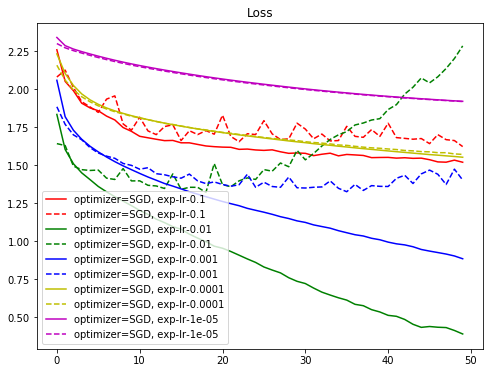

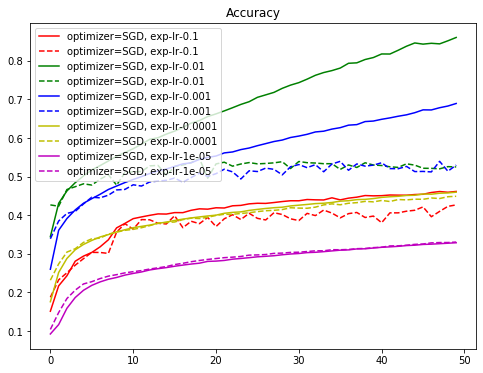

In [11]:
#optimizer=SGD
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "optimizer=SGD, exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 14.4416 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 65us/step - loss: 2.3390 - acc: 0.2141 - val_loss: 2.1820 - val_acc: 0.2464
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8965 - acc: 0.3128 - val_loss: 1.8436 - val_acc: 0.3344
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7841 - acc: 0.3606 - val_loss: 2.0032 - val_acc: 0.2977
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7179 - acc: 0.3861 - val_loss: 1.6996 - val_acc: 0.3763
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6535 - acc: 0.4102 - val_loss: 1.7782 - val_acc: 0.3576
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.6056 - acc: 0.4270 - val_loss: 1.6336 - val_acc: 0.4123
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5697 - acc: 0.4390 - val_loss: 1.6646 - val_acc: 0.4023
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7107 - acc: 0.3926 - val_loss: 1.7266 - val_acc: 0.3977
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6559 - acc: 0.4133 - val_loss: 1.7223 - val_acc: 0.3628
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6139 - acc: 0.4287 - val_loss: 1.7507 - val_acc: 0.3706
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5761 - acc: 0.4433 - val_loss: 1.6820 - val_acc: 0.3963
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5464 - acc: 0.4535 - val_loss: 1.5534 - val_acc: 0.4468
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5170 - acc: 0.4640 - val_loss: 1.5149 - val_acc: 0.4589
Epoch 9/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4928 - acc: 0.4750 - val_loss: 1.6618 - val_acc: 0.3994
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 3s 59us/step - loss: 1.8319 - acc: 0.3634 - val_loss: 1.8198 - val_acc: 0.3631
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7994 - acc: 0.3746 - val_loss: 1.7994 - val_acc: 0.3705
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7737 - acc: 0.3845 - val_loss: 1.7747 - val_acc: 0.3711
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7512 - acc: 0.3905 - val_loss: 1.7542 - val_acc: 0.3821
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7315 - acc: 0.3990 - val_loss: 1.7291 - val_acc: 0.3976
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7134 - acc: 0.4045 - val_loss: 1.7120 - val_acc: 0.4014
Epoch 10/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6971 - acc: 0.4119 - val_loss: 1.7128 - val_acc: 0.4015
Epoch 11/50
50000/50000 [==========================

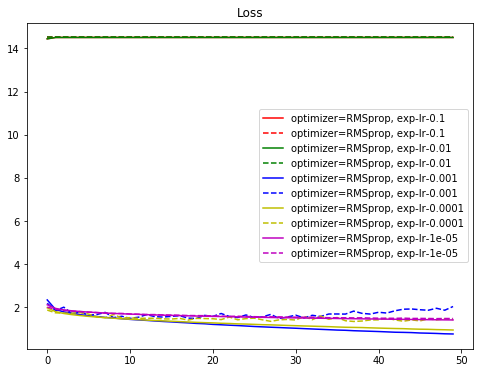

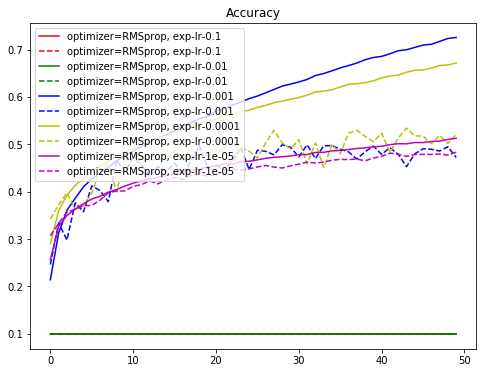

In [17]:
#optimizer=RMSprop
results = {}    
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "optimizer=RMSprop, exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 14.4395 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 64us/step - loss: 2.0008 - acc: 0.2815 - val_loss: 1.8906 - val_acc: 0.3159
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8004 - acc: 0.3608 - val_loss: 1.7964 - val_acc: 0.3627
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7267 - acc: 0.3904 - val_loss: 1.7177 - val_acc: 0.3970
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6804 - acc: 0.4094 - val_loss: 1.6663 - val_acc: 0.4144
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6445 - acc: 0.4216 - val_loss: 1.6617 - val_acc: 0.4146
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6161 - acc: 0.4325 - val_loss: 1.6166 - val_acc: 0.4387
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5931 - acc: 0.4427 - val_loss: 1.6037 - val_acc: 0.4309
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8830 - acc: 0.3458 - val_loss: 1.8729 - val_acc: 0.3461
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8560 - acc: 0.3555 - val_loss: 1.8498 - val_acc: 0.3536
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8366 - acc: 0.3625 - val_loss: 1.8328 - val_acc: 0.3635
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8213 - acc: 0.3681 - val_loss: 1.8195 - val_acc: 0.3667
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8084 - acc: 0.3715 - val_loss: 1.8087 - val_acc: 0.3704
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7978 - acc: 0.3748 - val_loss: 1.7983 - val_acc: 0.3738
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7888 - acc: 0.3794 - val_loss: 1.7900 - val_acc: 0.3748
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 3s 58us/step - loss: 2.1830 - acc: 0.2371 - val_loss: 2.1768 - val_acc: 0.2400
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1678 - acc: 0.2436 - val_loss: 2.1633 - val_acc: 0.2456
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1550 - acc: 0.2497 - val_loss: 2.1517 - val_acc: 0.2507
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1439 - acc: 0.2556 - val_loss: 2.1416 - val_acc: 0.2546
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1342 - acc: 0.2616 - val_loss: 2.1326 - val_acc: 0.2584
Epoch 9/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1255 - acc: 0.2656 - val_loss: 2.1245 - val_acc: 0.2634
Epoch 10/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.1176 - acc: 0.2706 - val_loss: 2.1169 - val_acc: 0.2686
Epoch 11/50
50000/50000 [==========================

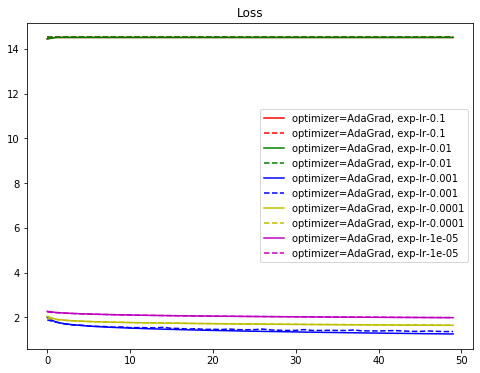

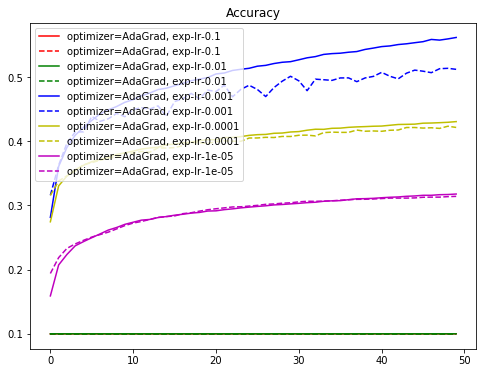

In [19]:
#optimizer=AdaGrad
results = {}      
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "optimizer=AdaGrad, exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 70us/step - loss: 14.4392 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 4s 71us/step - loss: 1.9296 - acc: 0.3077 - val_loss: 1.7507 - val_acc: 0.3754
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7162 - acc: 0.3848 - val_loss: 1.6860 - val_acc: 0.3998
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6240 - acc: 0.4204 - val_loss: 1.5878 - val_acc: 0.4332
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5443 - acc: 0.4492 - val_loss: 1.5505 - val_acc: 0.4454
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5101 - acc: 0.4609 - val_loss: 1.4980 - val_acc: 0.4654
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4753 - acc: 0.4749 - val_loss: 1.4880 - val_acc: 0.4735
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4381 - acc: 0.4856 - val_loss: 1.4955 - val_acc: 0.4642
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6403 - acc: 0.4220 - val_loss: 1.6201 - val_acc: 0.4314
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5834 - acc: 0.4437 - val_loss: 1.5781 - val_acc: 0.4442
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5402 - acc: 0.4566 - val_loss: 1.5272 - val_acc: 0.4631
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4971 - acc: 0.4733 - val_loss: 1.5128 - val_acc: 0.4640
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4662 - acc: 0.4856 - val_loss: 1.5011 - val_acc: 0.4690
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4397 - acc: 0.4948 - val_loss: 1.4729 - val_acc: 0.4751
Epoch 9/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4133 - acc: 0.5046 - val_loss: 1.4630 - val_acc: 0.4815
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 3s 63us/step - loss: 1.8184 - acc: 0.3711 - val_loss: 1.8055 - val_acc: 0.3678
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7841 - acc: 0.3815 - val_loss: 1.7714 - val_acc: 0.3853
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7553 - acc: 0.3916 - val_loss: 1.7479 - val_acc: 0.3909
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7310 - acc: 0.3999 - val_loss: 1.7265 - val_acc: 0.3970
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7103 - acc: 0.4069 - val_loss: 1.7105 - val_acc: 0.4001
Epoch 9/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6916 - acc: 0.4128 - val_loss: 1.6888 - val_acc: 0.4121
Epoch 10/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6741 - acc: 0.4214 - val_loss: 1.6749 - val_acc: 0.4166
Epoch 11/50
50000/50000 [==========================

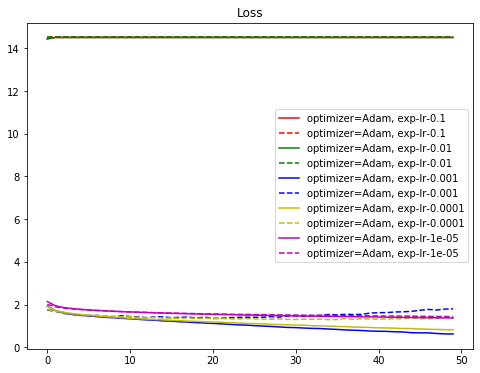

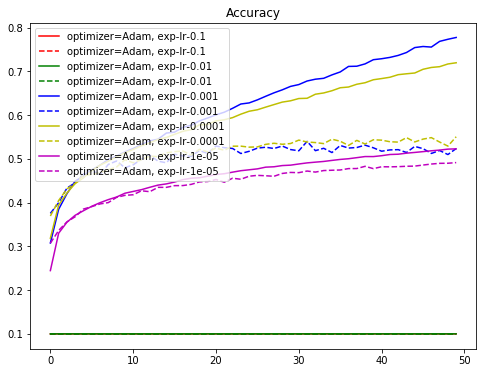

In [21]:
#optimizer=Adam
results = {}        
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "optimizer=Adam, exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()